## Create SVM Classifier

In [2]:
%matplotlib inline
import pandas as pd
from sklearn.svm import SVC
from sklearn import metrics

Create X_train, y_train, X_test, y_test

In [3]:
train_data = pd.read_csv('train-data.csv', index_col=[0])
test_data = pd.read_csv('test-data.csv', index_col=[0])

train_data.head()

y_train = train_data.target
y_test = test_data.target

X_train = train_data.drop(['target', 'target_name'], axis='columns')
X_test = test_data.drop(['target', 'target_name'], axis='columns')

Training

In [4]:
# model w/ RBF kernel
clf = SVC(kernel='rbf', gamma=0.1, C=0.0077)
clf.fit(X_train, y_train)

SVC(C=0.0077, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Validation 

In [5]:
# use stratified k-fold as validation method
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_train, y_train, cv=skf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.08)


Testing

In [31]:
# testing
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8841299731559757
Balanced Accuracy: 0.863001214186596


In [7]:
# from sklearn.model_selection import GridSearchCV
# Cs = np.logspace(-6, -1, 10)
# svc = SVC(kernel='rbf')
# clf = GridSearchCV(svc, param_grid=dict(C=Cs), n_jobs=-1)
# clf.fit(X_train, y_train)
# print(clf.best_score_)
# print(clf.best_estimator_.C)
# def svc_param_selection(X, y, nfolds):
#     Cs = [0.001, 0.01, 0.1, 1, 10]
#     gammas = [0.001, 0.01, 0.1, 1]
#     param_grid = {'C': Cs, 'gamma' : gammas}
#     grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
#     grid_search.fit(X, y)
#     grid_search.best_params_
#     return grid_search.best_params_

Metrics

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# in this order to make sure false positive and false negative are correct
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
print(conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
print("true negative: ", tn)
print("false positive: ", fp)
print("false negative: ", fn)
print("true positive: ", tp)
print("Specificity (true neg rate): ", tn / (tn + fp))
print("Sensitivity: (true pos rate)", tp / (tp + fn))
print(classification_report(y_test, y_pred, target_names=['CONTROL', 'DISCRETE']))

cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=[0, 1]), 
    index=['true:pos', 'true:neg'], 
    columns=['pred:pos', 'pred:neg']
)
print(cmtx)

[[14404    49]
 [ 2843  7663]]
true negative:  14404
false positive:  49
false negative:  2843
true positive:  7663
Specificity (true neg rate):  0.9966097004082197
Sensitivity: (true pos rate) 0.7293927279649723
              precision    recall  f1-score   support

     CONTROL       0.84      1.00      0.91     14453
    DISCRETE       0.99      0.73      0.84     10506

    accuracy                           0.88     24959
   macro avg       0.91      0.86      0.88     24959
weighted avg       0.90      0.88      0.88     24959

          pred:pos  pred:neg
true:pos     14404        49
true:neg      2843      7663


ROC 

AUC: 0.863


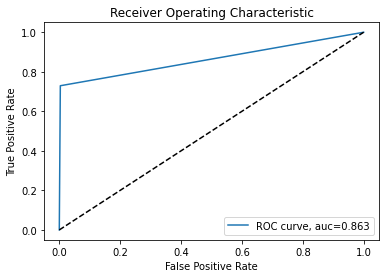

In [30]:
# calculate AUC
import matplotlib.pyplot as plt
auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc)[0:5])
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.savefig('ROC_curve.png')

In [10]:
# save predictive model for now
import joblib
joblib.dump(clf, 'rbf-clf.joblib')

['rbf-clf.joblib']

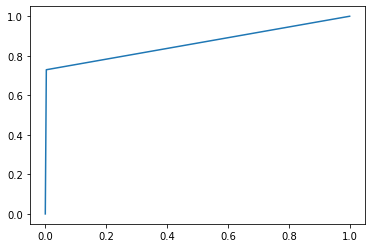

In [11]:
#svc_disp = metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()
plt.plot(fpr, tpr)